In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from tensorflow.keras.utils import to_categorical

/Users/wojtek/miniforge3/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [1]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_der(x):
    x = sigmoid(x)
    return x * (1 - x)


class Net:
    def __init__(self, layers, alpha=0.01):
        np.random.seed(2)
        self.num_layers = len(layers)
        self.weights = [np.random.randn(m, n)/np.sqrt(n) for n, m in zip(layers[:-1], layers[1:])]
        self.biases = [np.random.randn(m, 1) for m in layers[1:]]
        self.alpha = alpha

    def predict(self, X):
        for W, b in list(zip(self.weights, self.biases)):
            X = sigmoid(np.dot(W, X) + b)
        return X

    def feed_forward(self, X):
        activations = [X]
        for W, b in list(zip(self.weights, self.biases)):
            X = sigmoid(np.dot(W, X) + b)
            activations.append(X)
        return activations, X

    def backpropagate(self, X, y):
        delta_W = [np.zeros(W.shape) for W in self.weights]
        delta_b = [np.zeros(b.shape) for b in self.biases]

        activations, y_hat = self.feed_forward(X)
        delta = (y_hat - y) * activations[-1] * (1 - activations[-1])

        delta_b[-1] = delta
        delta_W[-1] = np.dot(delta, activations[-2].T)

        for l in range(2, self.num_layers):
            delta = np.dot(self.weights[-l + 1].T, delta) * activations[-l] * (1 - activations[-l])
            delta_b[-l] = delta
            delta_W[-l] = np.dot(delta, activations[-l - 1].T)
        return delta_W, delta_b

    def train(self, train_data, epochs, batch_size, test_data=None):
        history = []
        for e in range(epochs):
            np.random.shuffle(train_data)
            for i in range(0, len(train_data), batch_size):
                batch = train_data[i: i + batch_size]

                delta_W = [np.zeros(W.shape) for W in self.weights]
                delta_b = [np.zeros(b.shape) for b in self.biases]

                for x, y in batch:

                    batch_delta_W, batch_delta_b = self.backpropagate(x, y)
                    delta_W = [dW+bdW for dW, bdW in zip(delta_W, batch_delta_W)]
                    delta_b = [db+bdb for db, bdb in zip(delta_b, batch_delta_b)]

                    if batch_size == 1:
                        self.weights = [w - self.alpha / len(batch) * dW for w, dW in zip(self.weights, delta_W)]
                        self.biases = [b - self.alpha / len(batch) * db for b, db in zip(self.biases, delta_b)]
                        delta_W = [np.zeros(W.shape) for W in self.weights]
                        delta_b = [np.zeros(b.shape) for b in self.biases]

                if batch_size != 1:
                    self.weights = [w - self.alpha / len(batch) * dW for w, dW in zip(self.weights, delta_W)]
                    self.biases = [b - self.alpha / len(batch) * db for b, db in zip(self.biases, delta_b)]

            if test_data:
                print(f'Epoch {e}/{epochs}: accuracy: {self.score(test_data)}/{len(test_data)}')
            else:
                print(f'Epoch: {e}/{epochs}')
            history.append([[y for _, y in train_data], [self.predict(x) for x, _ in train_data]])
        return history

    def score(self, test_data):
        X = [d[0] for d in test_data]
        y = [d[1] for d in test_data]
        y_hat = np.array([np.argmax(self.predict(x)) for x in X])
        y_true = np.array([np.argmax(y_) for y_ in y])
        return np.sum(y_hat == y_true)

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
y = to_categorical(y)
list(zip(X, y))
X = [np.array(x).reshape(-1, 1) for x in X]
y = [np.array(x).reshape(-1, 1) for x in y]
data = list(zip(X, y))

Epoch 0/300: accuracy: 50/150
Epoch 1/300: accuracy: 50/150
Epoch 2/300: accuracy: 50/150
Epoch 3/300: accuracy: 50/150
Epoch 4/300: accuracy: 50/150
Epoch 5/300: accuracy: 100/150
Epoch 6/300: accuracy: 50/150
Epoch 7/300: accuracy: 101/150
Epoch 8/300: accuracy: 56/150
Epoch 9/300: accuracy: 100/150
Epoch 10/300: accuracy: 107/150
Epoch 11/300: accuracy: 93/150
Epoch 12/300: accuracy: 133/150
Epoch 13/300: accuracy: 100/150
Epoch 14/300: accuracy: 100/150
Epoch 15/300: accuracy: 107/150
Epoch 16/300: accuracy: 100/150
Epoch 17/300: accuracy: 100/150
Epoch 18/300: accuracy: 100/150
Epoch 19/300: accuracy: 100/150
Epoch 20/300: accuracy: 100/150
Epoch 21/300: accuracy: 100/150
Epoch 22/300: accuracy: 100/150
Epoch 23/300: accuracy: 100/150
Epoch 24/300: accuracy: 140/150
Epoch 25/300: accuracy: 100/150
Epoch 26/300: accuracy: 100/150
Epoch 27/300: accuracy: 100/150
Epoch 28/300: accuracy: 129/150
Epoch 29/300: accuracy: 100/150
Epoch 30/300: accuracy: 100/150
Epoch 31/300: accuracy: 10

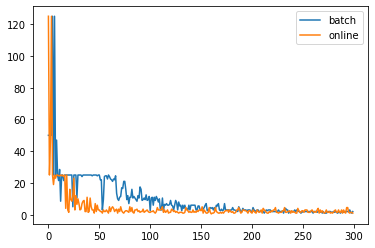

In [12]:
EPOCHS = 300
ALPHA = 0.05

def get_preds(vec, epochs, data_size):
    return np.array([np.argmax(a) for a in np.array(vec).reshape(epochs*data_size, 3)]).reshape(epochs, data_size)

def plot_loss(history, label):
    y_true = [y for y, _ in history]
    preds = [y for _, y in history]
    y_true = get_preds(y_true, EPOCHS, 150)
    preds = get_preds(preds, EPOCHS, 150)
    loss = [np.sum((y - pred)**2)/2 for pred, y in zip(preds, y_true)]
    plt.plot(range(EPOCHS), loss, label=label)

m1 = Net([4, 30, 50, 3], ALPHA)
m2 = Net([4, 30, 50, 3], ALPHA)
h1 = m1.train(data, epochs=EPOCHS, batch_size=5, test_data=data)
h2 = m2.train(data, epochs=EPOCHS, batch_size=1, test_data=data)
plot_loss(h1, 'batch')
plot_loss(h2, 'online')
plt.legend()
plt.show()